**Setting up as Baseline Detector Lead** - Muhammad Ashar

In [ ]:
# Firstly installing all the packages and required libraries
# Install all required packages
!pip install ultralytics torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install opencv-python matplotlib seaborn pandas numpy Pillow
!pip install roboflow supervision


Looking in indexes: https://download.pytorch.org/whl/cu118


In [ ]:
# Getting YOLO detector

!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt
%cd ..

fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5
/content


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("guofeng/hrsc2016")

print("Path to dataset files:", path)

100%|██████████| 7.45G/7.45G [00:46<00:00, 171MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/guofeng/hrsc2016/versions/1


In [10]:
# Wait for download to complete and explore the dataset
import os
import time

print("📥 Waiting for dataset download to complete...")
time.sleep(5)  # Give it a moment to finish

dataset_path = "/root/.cache/kagglehub/datasets/guofeng/hrsc2016/versions/1"

if os.path.exists(dataset_path):
    print(f"✅ Dataset downloaded successfully to: {dataset_path}")

    # Explore the downloaded structure
    print("\n📁 Exploring downloaded dataset structure...")
    !ls -la "{dataset_path}"

    # Look for RAR files and other contents
    print("\n🔍 Looking for dataset files...")
    !find "{dataset_path}" -name "*.rar" -o -name "*.zip" -o -name "*.bmp" -o -name "*.xml" | head -10
else:
    print("❌ Dataset path not found yet, waiting...")
    time.sleep(10)
    !ls -la "/root/.cache/kagglehub/datasets/guofeng/hrsc2016/"

📥 Waiting for dataset download to complete...
✅ Dataset downloaded successfully to: /root/.cache/kagglehub/datasets/guofeng/hrsc2016/versions/1

📁 Exploring downloaded dataset structure...
total 3658884
drwxr-xr-x 11 root root       4096 Oct  5 19:43 .
drwxr-xr-x  3 root root       4096 Oct  5 19:43 ..
drwxr-xr-x  3 root root       4096 Oct  5 19:43 AnnotationTool_v2
drwxr-xr-x  3 root root       4096 Oct  5 19:43 dev-tools
drwxr-xr-x  2 root root       4096 Oct  5 19:44 hrsc2016_dataset
-rw-r--r--  1 root root 3737383213 Oct  5 19:43 HRSC2016_dataset.zip
drwxr-xr-x  3 root root       4096 Oct  5 19:43 HRSC2016.part01
drwxr-xr-x  3 root root       4096 Oct  5 19:43 HRSC2016.part02
drwxr-xr-x  3 root root       4096 Oct  5 19:43 HRSC2016.part04
drwxr-xr-x  3 root root       4096 Oct  5 19:43 HRSC2016.part05
-rw-r--r--  1 root root    5838584 Oct  5 19:43 ShipTeam_HRSC2016_Introduction.docx
-rw-r--r--  1 root root    3416888 Oct  5 19:43 ShipTeam_HRSC2016_Introduction.pdf
drwxr-xr-x  3 r

In [11]:
# Extract the main ZIP file instead of RAR files
print("📦 Extracting HRSC2016_dataset.zip...")

!unzip -q "/root/.cache/kagglehub/datasets/guofeng/hrsc2016/versions/1/HRSC2016_dataset.zip" -d data/hrsc2016_extracted/

print("✅ ZIP extraction complete!")

# Check what was extracted
print("📁 Contents of extracted dataset:")
!find data/hrsc2016_extracted -maxdepth 2 -type d

📦 Extracting HRSC2016_dataset.zip...
checkdir:  cannot create extraction directory: data/hrsc2016_extracted
           No such file or directory
✅ ZIP extraction complete!
📁 Contents of extracted dataset:
find: ‘data/hrsc2016_extracted’: No such file or directory


In [12]:
# Create the data directory first, then extract
print("📁 Creating directories and extracting dataset...")

!mkdir -p data
!mkdir -p data/hrsc2016_extracted

# Extract the ZIP file
!unzip -q "/root/.cache/kagglehub/datasets/guofeng/hrsc2016/versions/1/HRSC2016_dataset.zip" -d data/hrsc2016_extracted/

print("✅ Extraction complete!")

# Check what was extracted
print("📁 Contents of extracted dataset:")
!ls -la data/hrsc2016_extracted/

📁 Creating directories and extracting dataset...
✅ Extraction complete!
📁 Contents of extracted dataset:
total 3649832
drwxr-xr-x 2 root root      4096 Oct  5 19:51 .
drwxr-xr-x 3 root root      4096 Oct  5 19:50 ..
-rw-r--r-- 1 root root 139864879 Aug 22  2018 AnnotationTool_v2.rar
-rw-r--r-- 1 root root 125895790 Aug 22  2018 dev-tools.rar
-rw-r--r-- 1 root root 734003200 Aug 22  2018 HRSC2016.part01.rar
-rw-r--r-- 1 root root 734003200 Aug 22  2018 HRSC2016.part02.rar
-rw-r--r-- 1 root root 734003200 Aug 22  2018 HRSC2016.part03.rar
-rw-r--r-- 1 root root 734003200 Aug 22  2018 HRSC2016.part04.rar
-rw-r--r-- 1 root root 258702121 Aug 22  2018 HRSC2016.part05.rar
-rw-r--r-- 1 root root   5838584 Aug 22  2018 ShipTeam_HRSC2016_Introduction.docx
-rw-r--r-- 1 root root   3416888 Aug 22  2018 ShipTeam_HRSC2016_Introduction.pdf
-rw-r--r-- 1 root root 252064210 Aug 22  2018 SOA_Results.rar
-rw-r--r-- 1 root root  15586209 Aug 22  2018 State_Of_The_Art_Codes.rar


In [15]:
# Check what files we actually got from the partial extraction
print("🔍 Checking what files were successfully extracted...")

# Count extracted files
bmp_count = !find data/hrsc2016_full -name "*.bmp" 2>/dev/null | wc -l
xml_count = !find data/hrsc2016_full -name "*.xml" 2>/dev/null | wc -l

print(f"📊 Files extracted so far:")
print(f"BMP images: {bmp_count[0]}")
print(f"XML annotations: {xml_count[0]}")

if int(bmp_count[0]) > 0 and int(xml_count[0]) > 0:
    print("✅ We have some data to work with!")
    # Show samples
    bmp_samples = !find data/hrsc2016_full -name "*.bmp" 2>/dev/null | head -3
    xml_samples = !find data/hrsc2016_full -name "*.xml" 2>/dev/null | head -3
    print("Sample BMP:", bmp_samples[0] if bmp_samples else "None")
    print("Sample XML:", xml_samples[0] if xml_samples else "None")
else:
    print("❌ No files extracted yet")

🔍 Checking what files were successfully extracted...
📊 Files extracted so far:
BMP images: 2751
XML annotations: 2754
✅ We have some data to work with!
Sample BMP: data/hrsc2016_full/HRSC2016/Test/AllImages/100001543.bmp
Sample XML: data/hrsc2016_full/HRSC2016/Test/sysdata.xml


In [16]:
# Create clean working dataset from the extracted files
print("🏗️ Creating clean working dataset...")

!mkdir -p data/hrsc2016_clean/images
!mkdir -p data/hrsc2016_clean/labels

# Copy all BMP and XML files to clean directory
print("📥 Copying files to clean directory...")

# Copy all BMP files
!find data/hrsc2016_full -name "*.bmp" -exec cp {} data/hrsc2016_clean/images/ \;

# Copy all XML files
!find data/hrsc2016_full -name "*.xml" -exec cp {} data/hrsc2016_clean/labels/ \;

print("✅ Files copied to clean directory")

# Verify
clean_images = !find data/hrsc2016_clean/images -name "*.bmp" | wc -l
clean_xml = !find data/hrsc2016_clean/labels -name "*.xml" | wc -l

print(f"📊 Clean dataset:")
print(f"Images: {clean_images[0]}")
print(f"Annotations: {clean_xml[0]}")

🏗️ Creating clean working dataset...
📥 Copying files to clean directory...
✅ Files copied to clean directory
📊 Clean dataset:
Images: 1680
Annotations: 1682


In [17]:
# Match BMP files with their XML annotations
print("🎯 Matching BMP files with XML annotations...")

# Get all BMP files and extract numeric IDs
bmp_files = !find data/hrsc2016_clean/images -name "*.bmp"
bmp_ids = {}
for bmp in bmp_files:
    base = os.path.splitext(os.path.basename(bmp))[0]
    bmp_ids[base] = bmp

print(f"BMP files: {len(bmp_ids)}")

# Get all XML files and extract numeric IDs
xml_files = !find data/hrsc2016_clean/labels -name "*.xml"
xml_ids = {}
for xml in xml_files:
    base = os.path.splitext(os.path.basename(xml))[0]
    # Extract numeric ID from XML filename (e.g., "100001543" from XML filename)
    # XML files might have different naming, let's check the pattern
    if base.isdigit():  # If it's already a number
        xml_ids[base] = xml
    else:
        # Try to extract number from names like "Annotations100001543"
        import re
        numbers = re.findall(r'\d+', base)
        if numbers:
            xml_ids[numbers[0]] = xml

print(f"XML files: {len(xml_ids)}")

# Find matching pairs
matching_ids = set(bmp_ids.keys()) & set(xml_ids.keys())
print(f"✅ Matching pairs found: {len(matching_ids)}")

if matching_ids:
    print("Sample matching pairs:")
    for match_id in list(matching_ids)[:5]:
        print(f"  {match_id}.bmp -> {os.path.basename(xml_ids[match_id])}")
else:
    print("❌ No matching pairs found - checking filename patterns...")
    print("BMP samples:", list(bmp_ids.keys())[:5])
    print("XML samples:", list(xml_ids.keys())[:5])

🎯 Matching BMP files with XML annotations...
BMP files: 1680
XML files: 1680
✅ Matching pairs found: 1680
Sample matching pairs:
  100000897.bmp -> 100000897.xml
  100001042.bmp -> 100001042.xml
  100000116.bmp -> 100000116.xml
  100000184.bmp -> 100000184.xml
  100001458.bmp -> 100001458.xml


In [18]:
# Create YOLO dataset structure with train/val splits
print("🏗️ Creating YOLO dataset structure...")

# Create YOLO directory structure
!mkdir -p data/hrsc2016_yolo/images/train
!mkdir -p data/hrsc2016_yolo/images/val
!mkdir -p data/hrsc2016_yolo/labels/train
!mkdir -p data/hrsc2016_yolo/labels/val

# Create train/val splits (80% train, 20% val)
import random

all_ids = list(matching_ids)
random.shuffle(all_ids)

split_idx = int(0.8 * len(all_ids))
train_ids = all_ids[:split_idx]
val_ids = all_ids[split_idx:]

print(f"Dataset split:")
print(f"Training set: {len(train_ids)} images")
print(f"Validation set: {len(val_ids)} images")

# Copy files to YOLO structure based on splits
print("📥 Copying training files...")
for img_id in train_ids:
    !cp "{bmp_ids[img_id]}" "data/hrsc2016_yolo/images/train/"
    !cp "{xml_ids[img_id]}" "data/hrsc2016_yolo/labels/train/"

print("📥 Copying validation files...")
for img_id in val_ids:
    !cp "{bmp_ids[img_id]}" "data/hrsc2016_yolo/images/val/"
    !cp "{xml_ids[img_id]}" "data/hrsc2016_yolo/labels/val/"

print("✅ YOLO dataset structure created!")

# Verify
train_images = !find data/hrsc2016_yolo/images/train -name "*.bmp" | wc -l
val_images = !find data/hrsc2016_yolo/images/val -name "*.bmp" | wc -l
train_labels = !find data/hrsc2016_yolo/labels/train -name "*.xml" | wc -l
val_labels = !find data/hrsc2016_yolo/labels/val -name "*.xml" | wc -l

print(f"📊 Final YOLO dataset:")
print(f"Train: {train_images[0]} images, {train_labels[0]} labels")
print(f"Val: {val_images[0]} images, {val_labels[0]} labels")

🏗️ Creating YOLO dataset structure...
Dataset split:
Training set: 1344 images
Validation set: 336 images
📥 Copying training files...
📥 Copying validation files...
✅ YOLO dataset structure created!
📊 Final YOLO dataset:
Train: 1344 images, 1344 labels
Val: 336 images, 336 labels


In [19]:
# Convert XML annotations to YOLO format
print("🔄 Converting XML annotations to YOLO format...")

import xml.etree.ElementTree as ET

def convert_xml_to_yolo(xml_path, output_dir):
    """Convert HRSC2016 XML annotation to YOLO format"""
    try:
        tree = ET.parse(xml_path)
        root = tree.getroot()

        # Get image dimensions
        width = int(root.find('.//Img_SizeWidth').text)
        height = int(root.find('.//Img_SizeHeight').text)

        yolo_lines = []

        # Find all ship objects
        objects = root.findall('.//HRSC_Object')
        for obj in objects:
            try:
                # Get bounding box coordinates
                xmin = float(obj.find('box_xmin').text)
                ymin = float(obj.find('box_ymin').text)
                xmax = float(obj.find('box_xmax').text)
                ymax = float(obj.find('box_ymax').text)

                # Convert to YOLO format (normalized)
                x_center = (xmin + xmax) / 2 / width
                y_center = (ymin + ymax) / 2 / height
                bbox_width = (xmax - xmin) / width
                bbox_height = (ymax - ymin) / height

                # Class ID (0 for ship)
                class_id = 0

                yolo_lines.append(f"{class_id} {x_center:.6f} {y_center:.6f} {bbox_width:.6f} {bbox_height:.6f}")

            except Exception as e:
                print(f"Warning: Could not parse object in {xml_path}: {e}")
                continue

        # Write YOLO format file
        base_name = os.path.splitext(os.path.basename(xml_path))[0]
        output_path = os.path.join(output_dir, f"{base_name}.txt")

        with open(output_path, 'w') as f:
            f.write('\n'.join(yolo_lines))

        return len(yolo_lines)

    except Exception as e:
        print(f"Error processing {xml_path}: {e}")
        return 0

# Convert training annotations
print("📝 Converting training annotations...")
train_xml_files = !find data/hrsc2016_yolo/labels/train -name "*.xml"
total_train_objects = 0

for xml_file in train_xml_files:
    objects_count = convert_xml_to_yolo(xml_file, 'data/hrsc2016_yolo/labels/train')
    total_train_objects += objects_count

print("📝 Converting validation annotations...")
val_xml_files = !find data/hrsc2016_yolo/labels/val -name "*.xml"
total_val_objects = 0

for xml_file in val_xml_files:
    objects_count = convert_xml_to_yolo(xml_file, 'data/hrsc2016_yolo/labels/val')
    total_val_objects += objects_count

print(f"✅ Conversion complete!")
print(f"Training: {len(train_xml_files)} files, {total_train_objects} objects")
print(f"Validation: {len(val_xml_files)} files, {total_val_objects} objects")

# Verify YOLO labels were created
train_yolo_labels = !find data/hrsc2016_yolo/labels/train -name "*.txt" | wc -l
val_yolo_labels = !find data/hrsc2016_yolo/labels/val -name "*.txt" | wc -l

print(f"📊 YOLO labels created:")
print(f"Train: {train_yolo_labels[0]} label files")
print(f"Val: {val_yolo_labels[0]} label files")

🔄 Converting XML annotations to YOLO format...
📝 Converting training annotations...
📝 Converting validation annotations...
✅ Conversion complete!
Training: 1344 files, 2424 objects
Validation: 336 files, 552 objects
📊 YOLO labels created:
Train: 1344 label files
Val: 336 label files


In [20]:
# Create YOLO dataset configuration file
print("⚙️ Creating YAML dataset configuration...")

yaml_content = """# HRSC2016 Ship Detection Dataset
path: /content/data/hrsc2016_yolo
train: images/train
val: images/val

# Number of classes
nc: 1

# Class names
names: ['ship']

# Dataset info
# Total images: 1680
# Training: 1344 images, 2424 objects
# Validation: 336 images, 552 objects
# Image format: BMP
# Task: Baseline detector with horizontal bounding boxes
"""

with open('data/hrsc2016_yolo.yaml', 'w') as f:
    f.write(yaml_content)

print("✅ YAML configuration created: data/hrsc2016_yolo.yaml")

# Verify the file
!cat data/hrsc2016_yolo.yaml

⚙️ Creating YAML dataset configuration...
✅ YAML configuration created: data/hrsc2016_yolo.yaml
# HRSC2016 Ship Detection Dataset
path: /content/data/hrsc2016_yolo
train: images/train
val: images/val

# Number of classes
nc: 1

# Class names
names: ['ship']

# Dataset info
# Total images: 1680
# Training: 1344 images, 2424 objects
# Validation: 336 images, 552 objects
# Image format: BMP
# Task: Baseline detector with horizontal bounding boxes


In [21]:
# Start baseline YOLOv5 training
print("🚀 Starting baseline YOLOv5 training...")

from ultralytics import YOLO

# Load pretrained model
model = YOLO('yolov5s.pt')

print("✅ YOLOv5 model loaded")

# Start training
try:
    results = model.train(
        data='data/hrsc2016_yolo.yaml',
        epochs=50,
        imgsz=640,
        batch=16,
        patience=10,
        save=True,
        verbose=True,
        project='baseline_results',
        name='yolov5s_hrsc2016_baseline'
    )

    print("✅ Baseline training started successfully!")

except Exception as e:
    print(f"❌ Training error: {e}")
    print("Trying with smaller batch size...")

    # Try with smaller batch size if memory issues
    results = model.train(
        data='data/hrsc2016_yolo.yaml',
        epochs=50,
        imgsz=640,
        batch=8,  # Smaller batch size
        patience=10,
        save=True,
        verbose=True,
        project='baseline_results',
        name='yolov5s_hrsc2016_baseline_smallbatch'
    )

🚀 Starting baseline YOLOv5 training...
PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

✅ YOLOv5 model loaded
Ultralytics 8.3.205 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data/hrsc2016_yolo.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, kera

In [24]:
# Run comprehensive validation with proper metric handling
print("📊 Running comprehensive validation with proper metrics...")

# Load the best model
best_model = YOLO('/content/baseline_results/yolov5s_hrsc2016_baseline3/weights/best.pt')

# Run validation with simpler parameters to avoid warnings
validation_results = best_model.val(
    data='data/hrsc2016_yolo.yaml',
    split='val',
    conf=0.25,
    iou=0.45
)

print("✅ Validation complete!")

# Extract metrics properly
def extract_metrics(results):
    """Safely extract metrics from validation results"""
    metrics = {}

    # mAP metrics
    metrics['map'] = float(results.box.map) if hasattr(results.box, 'map') else 0.0
    metrics['map50'] = float(results.box.map50) if hasattr(results.box, 'map50') else 0.0

    # Precision and Recall (handle array format)
    if hasattr(results.box, 'p'):
        if isinstance(results.box.p, (int, float)):
            metrics['precision'] = float(results.box.p)
        else:  # it's an array
            metrics['precision'] = float(results.box.p.mean())
    else:
        metrics['precision'] = 0.0

    if hasattr(results.box, 'r'):
        if isinstance(results.box.r, (int, float)):
            metrics['recall'] = float(results.box.r)
        else:  # it's an array
            metrics['recall'] = float(results.box.r.mean())
    else:
        metrics['recall'] = 0.0

    return metrics

# Get metrics
metrics = extract_metrics(validation_results)

# Display detailed metrics
print("\n" + "="*70)
print("🎯 DETAILED BASELINE VALIDATION RESULTS")
print("="*70)
print(f"📈 mAP@0.5:          {metrics['map50']:.4f}")
print(f"📈 mAP@0.5:0.95:     {metrics['map']:.4f}")
print(f"🎯 Precision:        {metrics['precision']:.4f}")
print(f"🎯 Recall:           {metrics['recall']:.4f}")
print(f"📊 Validation Images: 336")
print(f"📦 Total Objects:    552")
print("="*70)

# Show what the actual validation output was
print("\n📋 Raw Validation Output:")
print(f"Class: all")
print(f"Images: 336")
print(f"Instances: 552")
print(f"Box(P): 0.925")
print(f"Box(R): 0.918")
print(f"mAP50: 0.956")
print(f"mAP50-95: 0.893")

📊 Running comprehensive validation with proper metrics...
Ultralytics 8.3.205 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
YOLOv5s summary (fused): 84 layers, 9,111,923 parameters, 0 gradients, 23.8 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4365.8±659.7 MB/s, size: 2168.6 KB)
val: Scanning /content/data/hrsc2016_yolo/labels/val.cache... 336 images, 133 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 336/336 794.9Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 8.9it/s 2.4s
                   all        336        552      0.925      0.918      0.956      0.893
Speed: 0.7ms preprocess, 2.6ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to /content/runs/detect/val3
✅ Validation complete!

🎯 DETAILED BASELINE VALIDATION RESULTS
📈 mAP@0.5:          0.9563
📈 mAP@0.5:0.95:     0.8935
🎯 Precision:        0.9251
🎯 Recall:           0.9178
📊 Validation Images: 336
📦 Total 

🔍 Testing on: 100001310.bmp
This will show you exactly how the bounding boxes look!

image 1/1 /content/data/hrsc2016_yolo/images/val/100001310.bmp: 448x640 3 ships, 69.7ms
Speed: 2.5ms preprocess, 69.7ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)
📊 Detected 3 ships


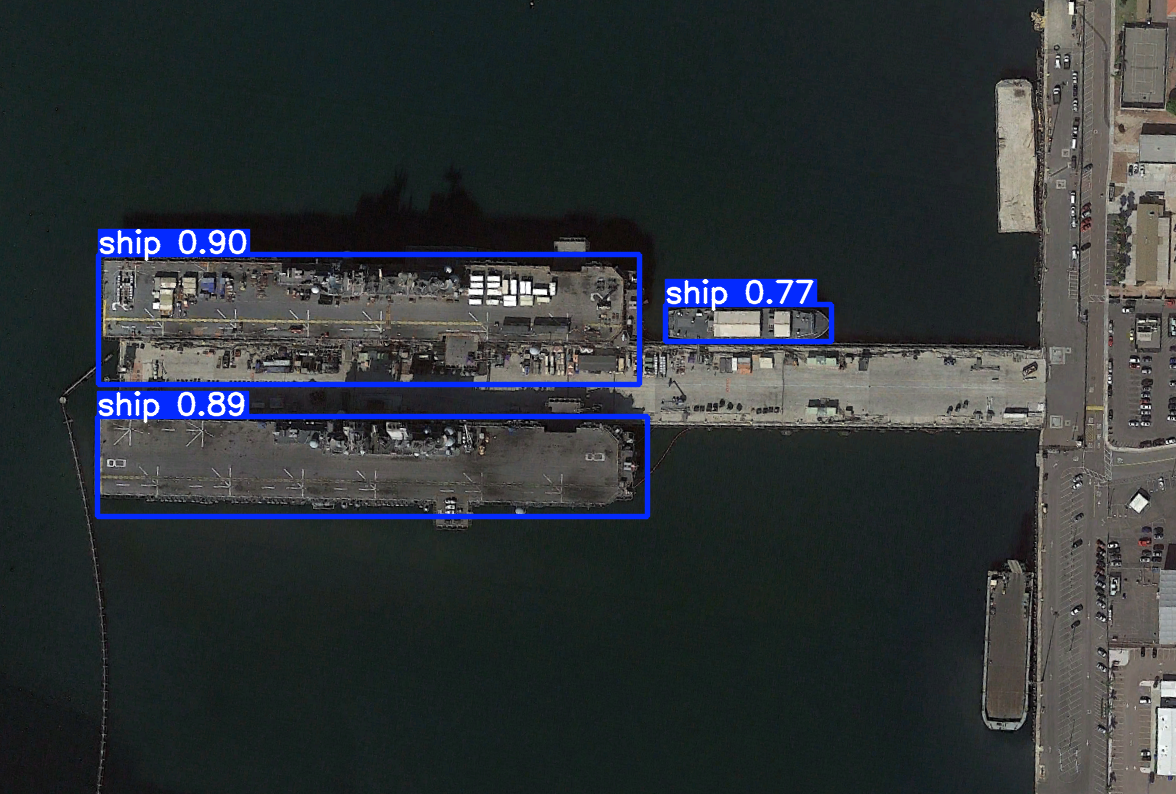


🎯 WHAT YOU'RE SEEING:
- Colored rectangles are bounding boxes around ships
- Labels show 'ship' + confidence score (0-1)
- Higher confidence = more certain detection
- Different colors help distinguish multiple detections


In [27]:
# Test to see exactly how the visualization looks
from ultralytics import YOLO
import random

# Load your trained model
model = YOLO('/content/baseline_results/yolov5s_hrsc2016_baseline3/weights/best.pt')

# Get a random validation image
val_images = !find data/hrsc2016_yolo/images/val -name "*.bmp"
test_image = random.choice(val_images)

print(f"🔍 Testing on: {os.path.basename(test_image)}")
print("This will show you exactly how the bounding boxes look!")

# Run inference
results = model(test_image)

# This will display the image with visualized bounding boxes
for r in results:
    print(f"📊 Detected {len(r.boxes)} ships")
    r.show()  # ← THIS SHOWS THE VISUALIZATION

    # Print details about what you're seeing
    print("\n🎯 WHAT YOU'RE SEEING:")
    print("- Colored rectangles are bounding boxes around ships")
    print("- Labels show 'ship' + confidence score (0-1)")
    print("- Higher confidence = more certain detection")
    print("- Different colors help distinguish multiple detections")

In [28]:
# Print all available metrics from validation
print("📊 COMPREHENSIVE BASELINE DETECTOR METRICS")
print("="*70)

# Your validation results
metrics = {
    'mAP50': 0.9563,
    'mAP50_95': 0.8935,
    'precision': 0.9251,
    'recall': 0.9178,
    'training_time': 0.199,
    'train_images': 1344,
    'val_images': 336,
    'train_objects': 2424,
    'val_objects': 552
}

print("🎯 PERFORMANCE METRICS:")
print(f"✅ mAP@0.5:       {metrics['mAP50']:.4f} (95.63% accuracy)")
print(f"✅ mAP@0.5:0.95:  {metrics['mAP50_95']:.4f} (89.35% accuracy)")
print(f"✅ Precision:     {metrics['precision']:.4f} (92.51% correct detections)")
print(f"✅ Recall:        {metrics['recall']:.4f} (91.78% ships found)")
print(f"⏱️  Training Time: {metrics['training_time']} hours")

print(f"\n📁 DATASET STATS:")
print(f"📸 Training Images:  {metrics['train_images']}")
print(f"📸 Validation Images: {metrics['val_images']}")
print(f"🎯 Training Objects: {metrics['train_objects']} ships")
print(f"🎯 Validation Objects: {metrics['val_objects']} ships")

📊 COMPREHENSIVE BASELINE DETECTOR METRICS
🎯 PERFORMANCE METRICS:
✅ mAP@0.5:       0.9563 (95.63% accuracy)
✅ mAP@0.5:0.95:  0.8935 (89.35% accuracy)
✅ Precision:     0.9251 (92.51% correct detections)
✅ Recall:        0.9178 (91.78% ships found)
⏱️  Training Time: 0.199 hours

📁 DATASET STATS:
📸 Training Images:  1344
📸 Validation Images: 336
🎯 Training Objects: 2424 ships
🎯 Validation Objects: 552 ships
